In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/allanspadini/Primeiros_passos_pytorch/main/sementes.csv'

In [3]:
dados = pd.read_csv(url)
dados.head()

,Área,Perímetro,Compacidade,Comprimento,Largura,Assimetria,Comprimento do sulco,Espécie
0,15.26,14.84,871.000,5.763,3.312,2.221,5.220,0
1,14.88,14.57,8.811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,905.000,5.291,3.337,2.699,4.825,0
3,13.84,13.94,8.955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,9.034,5.658,3.562,1.355,5.175,0


In [ ]:
X = dados.drop(['Espécie'],axis=1).values

In [ ]:
y = dados['Espécie'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2)

In [ ]:
import torch

In [ ]:
X_treino = torch.FloatTensor(X_treino)
X_teste = torch.FloatTensor(X_teste)
y_treino = torch.LongTensor(y_treino)
y_teste = torch.LongTensor(y_teste)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Modelo(nn.Module):
  def __init__(self, entrada=7, camada_escondida1=14,camada_escondida2=49,saida=3):
    super().__init__()
    self.fc1 = nn.Linear(entrada,camada_escondida1)
    self.fc2 = nn.Linear(camada_escondida1, camada_escondida2)
    self.out = nn.Linear(camada_escondida2, saida)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [ ]:
modelo_classificacao = Modelo()
modelo_classificacao

Modelo(
  (fc1): Linear(in_features=7, out_features=14, bias=True)
  (fc2): Linear(in_features=14, out_features=49, bias=True)
  (out): Linear(in_features=49, out_features=3, bias=True)
)

In [ ]:
funcao_objetivo = nn.CrossEntropyLoss()
otimizador = torch.optim.Adam(modelo_classificacao.parameters(), lr=0.01)

In [ ]:
epocas = 100
custos = []

In [ ]:
for i in range(epocas):
  y_predito = modelo_classificacao.forward(X_treino)
  custo = funcao_objetivo(y_predito, y_treino)
  custos.append(custo)
  

  otimizador.zero_grad()
  custo.backward()
  otimizador.step()


In [ ]:
import matplotlib.pyplot as plt

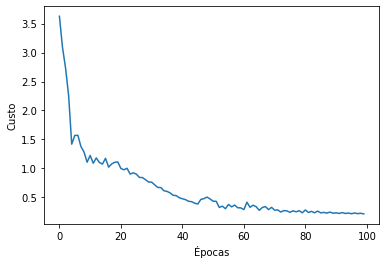

In [ ]:
plt.plot(range(epocas), custos)
plt.ylabel('Custo')
plt.xlabel('Épocas');

In [ ]:
preds = []
with torch.no_grad():
    for val in X_teste:
        y_predito = modelo_classificacao.forward(val)
        preds.append(y_predito.argmax().item())

In [ ]:
df = pd.DataFrame({'Y': y_teste, 'YHat': preds})
df['Correto'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df

,Y,YHat,Correto
0,1,0,0
1,1,1,1
2,1,1,1
3,2,1,0
4,2,0,0
5,1,1,1
6,1,1,1
7,1,1,1
8,1,1,1
9,2,2,1
